# 1. 문제정의
- 타이타닉호 탑승객의 정보를 통해서 생존자/사망자를 예측해보자!
- kaggle에서 좋은 점수를 받기

# 2. 데이터 수집
- kaggle 사이트에서 train, test, gender_submission

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 라이브러리

In [85]:
train = pd.read_csv('./train1.csv')
test = pd.read_csv('./test1.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. 데이터 전처리

In [86]:
# 사용하지 않을 것 같은 데이터 먼저 삭제
# PassenserId 컬럼 삭제
# 1~891번 까지 순서를 나타내기 위한 데이터이므로 생존 예측에는 영향을 끼치지
# 않을 것으로 생각된다.
# del : 열 삭제만 가능
# 키워드
del train['PassengerId']
# drop : 행 / 열의 삭제 가능
test.drop('PassengerId', axis = 1, inplace = True)
#inplace 속성을 주지 않으면 저장 되지 않음


In [87]:
print(train.shape)
print(test.shape)


(891, 11)
(418, 10)


In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [89]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [90]:
# 결측치를 채울 컬럼
# 공통 : Age, Cabin
# train : Embarked
# test : Fare

####  train-Embarked 채우기

In [91]:
# value_counts
# 컬럼안에 값들의 개수
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [92]:
# 최빈값으로 결측치 채움(결측치가 많을 때는 좋은 방법은 아님)
# fillna
train['Embarked'].fillna('S', inplace = True)

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


####  test-Fare 채우기

In [94]:
# 중앙값을 통해서 결측치를 채운다.

In [95]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [96]:
test['Fare'].fillna(14.45, inplace = True)

In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


#### Age 채우기 
- 다른 컬럼과의 상관관례를 통해서 결측치를 채워보자
- apply(axis = 1) 행
- drop(axis = 1) 열

In [98]:
# 상관관계(수치적으로 나타내기 때문에 숫자 컬럼들만 비교됨)
# corr
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [99]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [100]:
age_table = train[['Pclass','Sex','Age']].groupby(by=['Pclass','Sex']).median()# 중앙값

In [101]:
age_table

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [200]:
age_table.loc[3,'female'][0]
#age_table.loc[(3,'female'),'Age']

21.5

In [192]:
def fill_age(person) :
    if np.isnan(person['Age']): # 결측치면 True, 결측치가 아니면 False
        return age_table.loc[person['Pclass'],person['Sex']][0]
    else :
        return person['Age']

In [193]:
train.apply(fill_age,axis=1) #apply함수는 동작이 한줄 뽑아서 넣는다
# 매개변수.apply(적용될 함수,

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.5
889    26.0
890    32.0
Length: 891, dtype: float64

In [ ]:
train.loc[train['']]

In [105]:
np.isnan(train.iloc[1]['Age'])

False

In [106]:
train.apply(fill_age,axis=1)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.5
889    26.0
890    32.0
Length: 891, dtype: float64

In [107]:
train['Age'] = train.apply(fill_age,axis = 1)
test['Age'] = train.apply(fill_age,axis = 1)

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


#### 공통 - Cabin 채우기

In [109]:
# unique : 중복을 제거하고 하나의 값만 출력
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [110]:
train['Cabin'].str[0]

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [111]:
# 첫번째 글자만 가져와서 저장
train['Cabin'] = train['Cabin'].str[0]
test['Cabin'] = test['Cabin'].str[0]

In [112]:
train['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [113]:
# 결측치를 'M' 값으로 채우기
train['Cabin'].fillna('M', inplace = True)
test['Cabin'].fillna('M', inplace = True)

# 4. 탐색적 데이터 분석 


- survived : 생존=1, 죽음=0
- pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
- sibsp : 함께 탑승한 형제 또는 배우자 수
- parch : 함께 탑승한 부모 또는 자녀 수
- ticket : 티켓 번호
- cabin : 선실 번호
- embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

- 특성공학 : 컬럼에 연산을 통해서 의미있는 새로운 정보를 추출하는 행위
- SibSp(형제자매수) + Parch(부모자식수) + 1 = Family_Size

In [114]:
#Falily_Size 컬럼 만들기
train['Family_Size'] = train.SibSp + train.Parch+1

In [115]:
# Family_Size 컬럼 만들기
test['Family_Size'] = test.SibSp + test.Parch+1

In [116]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,M,S,4
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,1


<AxesSubplot:xlabel='Family_Size', ylabel='count'>

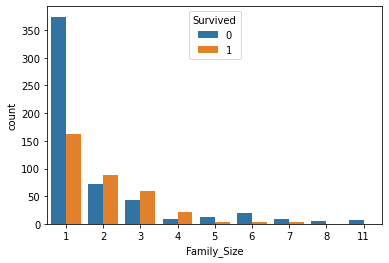

In [117]:
# 그래프를 그려서 연관성을 확인
sns.countplot(data = train, x = 'Family_Size', hue = 'Survived')

- 1명일때는 죽은사람의 비율이 높다
- 2 ~ 4명일때는 산 사람의 비율이 높다
- 5명 이상일때는 죽은사람의 비율이 높다
- 수치형 > 범주형(Binning)
- 사소한 관찰 오류를 줄여준다.

In [118]:
# bins : 구간
# 0초과 1이하, 1초과 4이하, 4초과 20이하
bins = [0,1,4,20]
# 구간에 대한 범주 이름
labels = ['Alone','Small','Large']
# cut : 카테고리(범주형) 데이터를 만듬
train_cut = pd.cut(train['Family_Size'], bins=bins, labels=labels)
train['Family_Group']=train_cut

In [119]:
test_cut = pd.cut(test['Family_Size'], bins=bins, labels=labels)
test['Family_Group']=test_cut

In [120]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group
0,3,"Kelly, Mr. James",male,22.0,0,0,330911,7.8292,M,Q,1,Alone
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,38.0,1,0,363272,7.0000,M,S,2,Small
2,2,"Myles, Mr. Thomas Francis",male,26.0,0,0,240276,9.6875,M,Q,1,Alone
3,3,"Wirz, Mr. Albert",male,35.0,0,0,315154,8.6625,M,S,1,Alone
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35.0,1,1,3101298,12.2875,M,S,3,Small
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,M,S,1,Alone
414,1,"Oliva y Ocana, Dona. Fermina",female,44.0,0,0,PC 17758,108.9000,C,C,1,Alone
415,3,"Saether, Mr. Simon Sivertsen",male,21.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,1,Alone
416,3,"Ware, Mr. Frederick",male,34.0,0,0,359309,8.0500,M,S,1,Alone


####  Cabin 컬럼 확인

- M에서는 상대적으로 많은 사람이 죽었다.
- 생존여부 판단에 사용해도 괜찮을거 같다.

####  Pclass 컬럼 확인

<AxesSubplot:xlabel='Pclass', ylabel='count'>

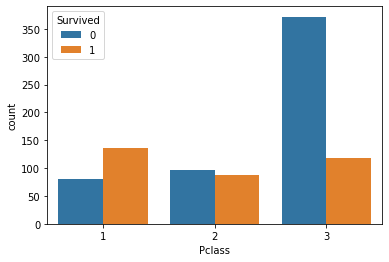

In [121]:
# 그래프를 그려서 연관성을 확인
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')

- 등급이 높아질수록 산 사람의 비율이 높다

####  Cabin과 Pclass 컬럼 확인

<AxesSubplot:xlabel='Cabin', ylabel='count'>

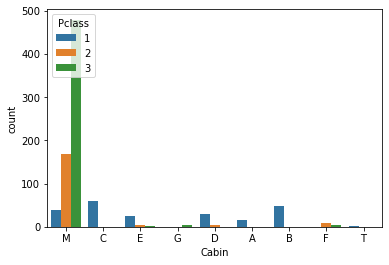

In [122]:
# 그래프를 그려서 연관성을 확인
sns.countplot(data = train, x = 'Cabin', hue = 'Pclass')

- M 구역에는 3등급 사람들이 많이 탑승을 함 (사망자의 비율이 높음)
- A,B,C구역에는 1등급만 존재

####  Embarked 컬럼 확인

<AxesSubplot:xlabel='Embarked', ylabel='count'>

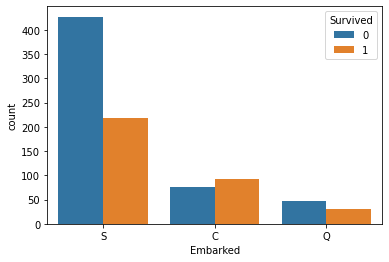

In [123]:
# 그래프를 그려서 연관성을 확인
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')

- S 에서 탑승한 사람들이 많이 죽었다
- S에서 탄 사람들은 3등급 객실이나 M구역 객실에 있지 않을까?

####  Age 컬럼 확인

<AxesSubplot:xlabel='Sex', ylabel='Age'>

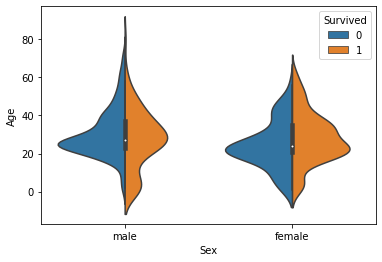

In [124]:
sns.violinplot(data = train, x = 'Sex', y = 'Age', hue='Survived', split = True)

- 남자는 산사람과 죽은사람의 나이대가 차이가 있다
- 여자는 산사람과 죽은사람의 나이대가 비슷하다.
- 어린아이들은 남자가 많이 살았고, 여자는 많이 죽었다.

####  Fare컬럼 확인

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

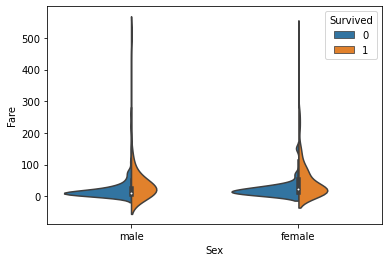

In [125]:
sns.violinplot(data = train, x = 'Sex',y='Fare', hue='Survived', split = True)

- 요금이 저렴할 경우 죽은 사람들이 좀 더 많다 

#### Text 데이터

- Name, Ticket
- 비정형 데이터를 특성공학을 통해 정형데이터로 만들어보자

In [126]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [127]:
#strip() : 글자 앞과 뒤의 공백 삭제
def split_title(name):
    return name.split(',')[1].split('.')[0].strip()

In [128]:
train['Title'] = train['Name'].apply(split_title)
test['Title'] = test['Name'].apply(split_title)

In [129]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Family_Group', 'Title'],
      dtype='object')

In [130]:
# Name 삭제
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

In [131]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,M,S,2,Small,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,C,2,Small,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,1,Alone,Miss
3,1,1,female,35.0,1,0,113803,53.1000,C,S,2,Small,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,M,S,1,Alone,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,M,S,1,Alone,Rev
887,1,1,female,19.0,0,0,112053,30.0000,B,S,1,Alone,Miss
888,0,3,female,21.5,1,2,W./C. 6607,23.4500,M,S,4,Small,Miss
889,1,1,male,26.0,0,0,111369,30.0000,C,C,1,Alone,Mr


In [132]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Lady              1
Capt              1
the Countess      1
Mme               1
Don               1
Jonkheer          1
Sir               1
Name: Title, dtype: int64

- 호칭의 범주를 줄여보자
- Mr, Mrs, Miss, Master, Dr, Other
- map함수를 활용해서 mapping

In [133]:
convert_title_dic = {
    'Mr' : 'Mr' , 
    'Mrs' : 'Mrs', 
    'Miss' : 'Miss', 
    'Master' : 'Master', 
    'Don' : 'Other', 
    'Rev' : 'Rev', 
    'Dr': 'Other', 
    'Mme' : 'Other', 
    'Ms' : 'Other',
    'Major' : 'Other',
    'Lady' : 'Other',
    'Sir' : 'Other',
    'Mlle' : 'Other',
    'Col' : 'Other', 
    'Capt' : 'Other', 
    'the Countess' : 'Other',
    'Jonkheer' : 'Other',
    'Dona' : 'Other'
}

In [134]:
train['Title'] = train['Title'].map(convert_title_dic)

In [135]:
test['Title'] = test['Title'].map(convert_title_dic)

In [136]:
train['Title'].unique()
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [137]:
# Ticket
train['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      7
347088      6
CA 2144     6
           ..
2628        1
113800      1
244361      1
345767      1
A/5 2466    1
Name: Ticket, Length: 681, dtype: int64

In [138]:
train.drop('Ticket' ,axis = 1, inplace = True)
test.drop('Ticket' ,axis = 1, inplace = True)

In [139]:
train.shape, test.shape

((891, 12), (418, 11))

In [140]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,Family_Group,Title
0,0,3,male,22.0,1,0,7.2500,M,S,2,Small,Mr
1,1,1,female,38.0,1,0,71.2833,C,C,2,Small,Mrs
2,1,3,female,26.0,0,0,7.9250,M,S,1,Alone,Miss
3,1,1,female,35.0,1,0,53.1000,C,S,2,Small,Mrs
4,0,3,male,35.0,0,0,8.0500,M,S,1,Alone,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,M,S,1,Alone,Rev
887,1,1,female,19.0,0,0,30.0000,B,S,1,Alone,Miss
888,0,3,female,21.5,1,2,23.4500,M,S,4,Small,Miss
889,1,1,male,26.0,0,0,30.0000,C,C,1,Alone,Mr


## 글자 데이터를 숫자 데이터로 변경해보자
- 모델은 수치데이터만 학습할 수 있기 때문에 글자 데이터를 수치 데이터로 바꿈
- 문자 컬럼 : Sex, Cabin, Embarked, Family_Group, Title -> 원핫인코딩

In [141]:
categorical_feature = ['Sex', 'Cabin','Embarked', 'Family_Group', 'Title']

In [142]:
train.shape,test.shape

((891, 12), (418, 11))

In [143]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Family_Size', 'Family_Group', 'Title'],
      dtype='object')

In [144]:
y_train = train['Survived']
train.drop('Survived', axis=1, inplace = True)

In [145]:
train.shape,test.shape,y_train.shape

((891, 11), (418, 11), (891,))

In [146]:
# concat : 행, 열을 기준으로 데이터프레임을 합침
# merge : 데이터를 기준으로 데이터프레임을 합침
# ignore_index = True: 기존의 인덱스 번호를 무시하고 새로 인덱스 번호를 생성
combine = pd.concat([train,test], ignore_index = True)

In [147]:
combine

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,Family_Group,Title
0,3,male,22.0,1,0,7.2500,M,S,2,Small,Mr
1,1,female,38.0,1,0,71.2833,C,C,2,Small,Mrs
2,3,female,26.0,0,0,7.9250,M,S,1,Alone,Miss
3,1,female,35.0,1,0,53.1000,C,S,2,Small,Mrs
4,3,male,35.0,0,0,8.0500,M,S,1,Alone,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,male,30.0,0,0,8.0500,M,S,1,Alone,Mr
1305,1,female,44.0,0,0,108.9000,C,C,1,Alone,Other
1306,3,male,21.5,0,0,7.2500,M,S,1,Alone,Mr
1307,3,male,34.0,0,0,8.0500,M,S,1,Alone,Mr


In [148]:
# 원핫 인코딩
# get_dummies
one_hot = pd.get_dummies(combine[categorical_feature])

In [149]:
# 기존 글자데이터 지우기
combine.drop(categorical_feature, axis = 1, inplace = True)

In [150]:
# 원핫 인코딩 데이터 합치기
total_combine = pd.concat([combine, one_hot], axis = 1)

In [152]:
total_combine.shape

(1309, 29)

In [153]:
X_train = total_combine.iloc[:891]
X_test = total_combine.iloc[891:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(891, 29)
(418, 29)
(891,)


# 5. 모델 선택 및 하이퍼파라미터 조정 

In [154]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 2)

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
# 검증 데이터 만들기(validation)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,random_state = 7)

In [157]:
X_train.shape,X_val.shape

((668, 29), (223, 29))

In [158]:
 y_train.shape, y_val.shape

((668,), (223,))

In [165]:
train_score_list = []
val_score_list = []

for i in range(1,50) : # 트리 모델이 단순 -> 복잡
    t_model = KNeighborsClassifier(n_neighbors=i)
    t_model.fit(X_train,y_train)
    
    train_score = t_model.score(X_train,y_train)
    val_score = t_model.score(X_val,y_val)
    
    train_score_list.append(train_score)
    val_score_list.append(val_score)

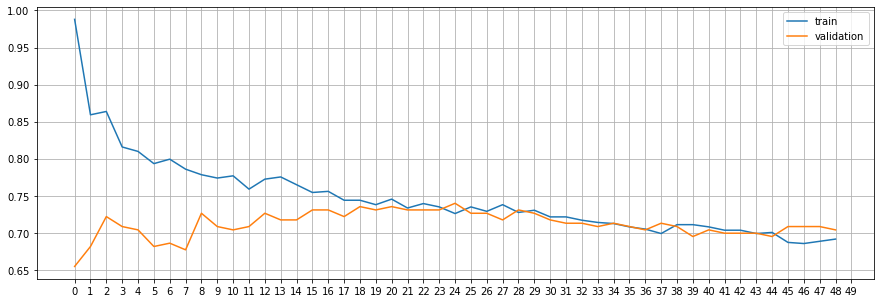

In [166]:
plt.figure(figsize=(15,5)) # 가로,세로
plt.plot(train_score_list,label='train')
plt.plot(val_score_list,label='validation')
plt.xticks(range(0,50))
plt.legend() # 범례
plt.grid()
plt.show()

In [167]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

In [168]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [169]:
trans_X_train = scaler.transform(X_train)

In [170]:
result = cross_val_score(knn_model,
                        trans_X_train,
                        y_train,
                        cv = 5)
print(result)
print(result.mean())

[0.80597015 0.85820896 0.79850746 0.80451128 0.7593985 ]
0.8053192683200538


In [160]:
# 교차검증
from sklearn.model_selection import cross_val_score

In [161]:
result = cross_val_score(knn_model,
                        X_train,
                        y_train,
                        cv = 5)
print(result)
print(result.mean())

[0.67164179 0.75373134 0.76865672 0.7593985  0.67669173]
0.7260240152620356


In [162]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)

result = cross_val_score(knn_model,
                        X_train,
                        y_train,
                        cv = 5)
print(result)
print(result.mean())

# StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 스케일러 학습
# 특성들에 대한 값의 범위를 확인하고 새로운 값이 들어왔을 때 어떤 값으로 바꿔야 하는지를 학습
scaler.fit(X_train)

trans_X_train = scaler.transform(X_train)

# 값을 바꿔줌
# transform()
result = cross_val_score(knn_model,
                        trans_X_train,
                        y_train,
                        cv = 5)
print(result)
print(result.mean())

[0.67164179 0.75373134 0.76865672 0.7593985  0.67669173]
0.7260240152620356
[0.80597015 0.85820896 0.79850746 0.80451128 0.7593985 ]
0.8053192683200538
